In [1]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

Gradient Descent :

x = weight * X + bias

In [2]:
weight = 0.7
bias = 0.3

# create data output
X = torch.arange(0, 1, 0.02).unsqueeze(dim = 1)
y = weight * X + bias

X[:10], y[:10] # maximum values is 10

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
# create train/test split
train_split = int(0.8 * len(X)) # 80% of data for train
X_train, y_train = X[: train_split], y[: train_split]
X_test, y_test = X[train_split: ], y[train_split: ]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [4]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

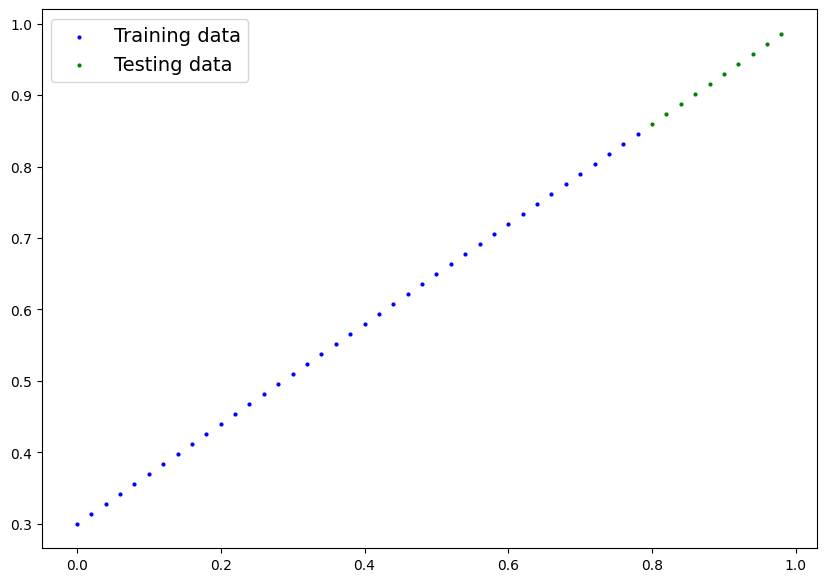

In [5]:
plot_predictions();

# Model with Manual Parameters
---

In [6]:
# build a model regression
class LinearRegressionModel(nn.Module): # neural network block, Requires a forward() method be implemented.
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, #random with start 1
                                            dtype = torch.float), # dytpe float
                                requires_grad = True) # can upgrade this with gradient descent
    self.bias = nn.Parameter(torch.randn(1, #random with start 1
                                            dtype = torch.float), # dytpe float
                                requires_grad = True) # can upgrade this with gradient descent

  def forward(self, x:torch.Tensor) : # change to torch type
      return self.weights * x + self.bias

In [7]:
# check model

# generated data
torch.manual_seed(42)

# instance
model_0 = LinearRegressionModel()


# check nn.parameter
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [8]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [9]:
with torch.inference_mode(): # prediction without graidient training
    y_preds = model_0(X_test)

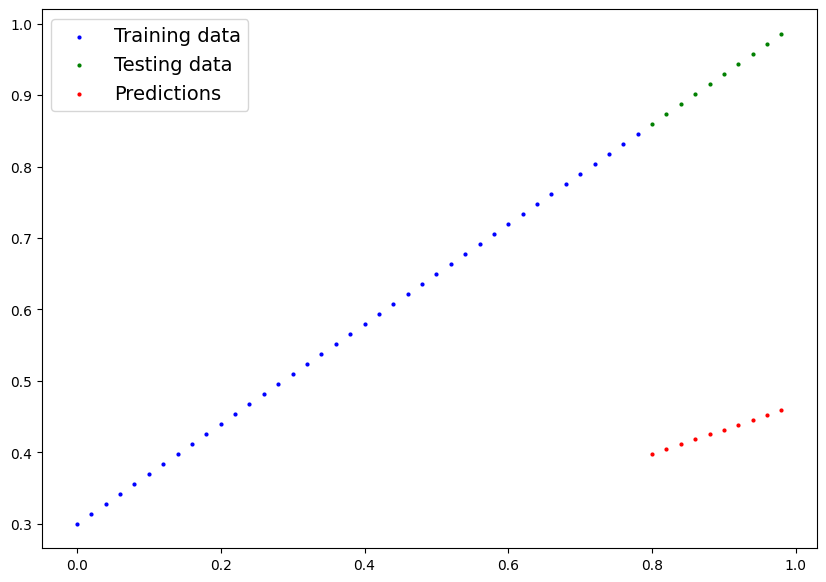

In [10]:
# make a predict
plot_predictions(predictions=y_preds)

In [11]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-mae-loss-annotated.png" alt="Deskripsi Gambar">

- PyTorch has plenty of built-in **loss functions** in ``torch.nn``

- You can find various **optimization** function implementations in ``torch.optim``

In [12]:
# loss function
loss_fn = nn.L1Loss() # MAE

# optimize
optim  = torch.optim.SGD(params = model_0.parameters(),
                         lr = 0.01 )

<img src="https://lp2m.uma.ac.id/wp-content/uploads/2023/10/SGD.png" alt="Deskripsi Gambar">

In [13]:
# traine the model
torch.manual_seed(42)

# set epoch
epochs = 50

# loss values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):

  # model parameter to data train
  model_0.train()

  # forward
  y_pred = model_0(X_train)

  # calculate loss
  loss = loss_fn(y_pred, y_train)

  # zero grad optim --> Restart gradient before next calculate loss gradienta again
  optim.zero_grad()

  # loss backwards
  loss.backward()

  # progress optim
  optim.step()

  # evaluation
  model_0.eval()

  # predict without gradient data train
  with torch.inference_mode():

    # forward
    test_pred = model_0(X_test)

    # calculate loss
    test_loss = loss_fn(test_pred,
                        y_test.type(torch.float)) # change to float

    if epoch % 10 == 0: # each 10 epoch
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy()) # ignore calculate gradient
      test_loss_values.append(test_loss.detach().numpy()) # ignore calculate gradient
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428 
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688 
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703 
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106 


<img src="https://miro.medium.com/v2/resize:fit:1400/1*ZXAOUqmlyECgfVa81Sr6Ew.png" alt="Deskripsi Gambar">


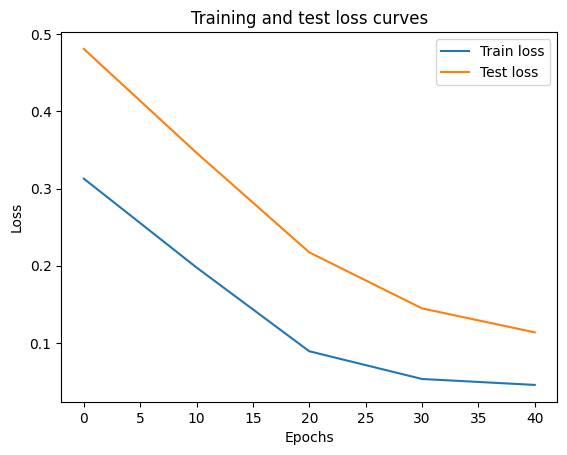

In [14]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [15]:
# sanichek model after optimum loss function

model_0.eval()

with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.7784],
        [0.7883],
        [0.7981],
        [0.8079],
        [0.8178],
        [0.8276],
        [0.8375],
        [0.8473],
        [0.8571],
        [0.8670]])

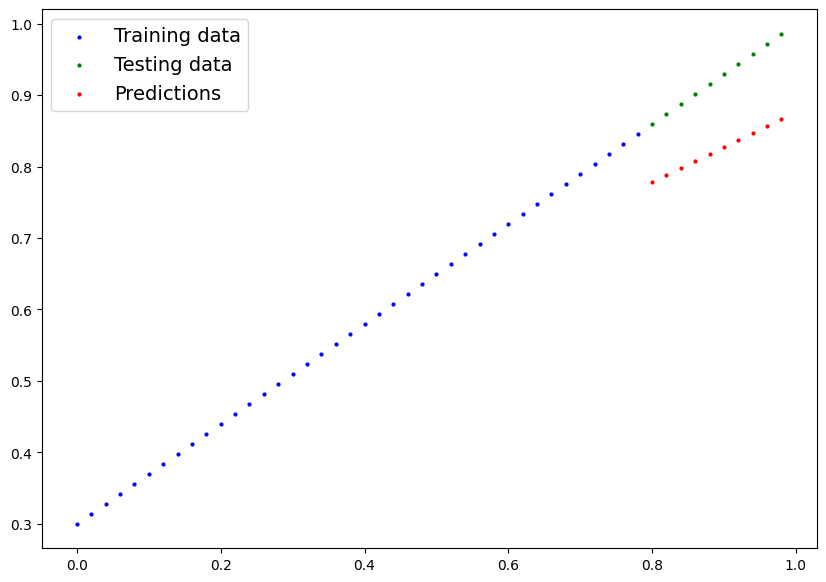

In [16]:
plot_predictions(predictions=y_preds)

So much better, but is still not enough, let's try with other method

# Model with Automate Parameters
---

In [17]:
# save model

from pathlib import Path

# Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [18]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

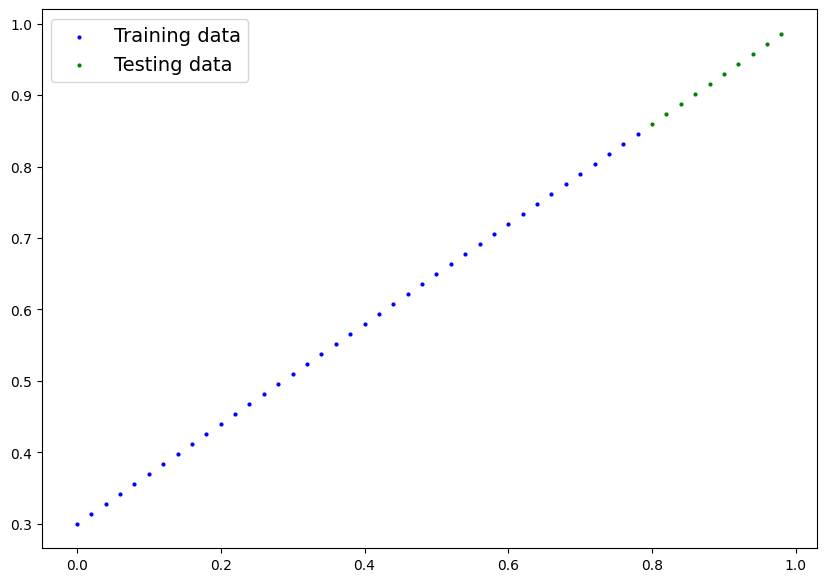

In [19]:
plot_predictions(X_train, y_train, X_test, y_test)

In [20]:
# put loaded model
loaded_model_0.eval()

# inference mode
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

In [21]:
# compare with previous for validate
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [22]:
# Subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)

    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed when creating the model
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [23]:
# training
torch.manual_seed(42)

epochs = 50

# traine the model
torch.manual_seed(42)

# set epoch
epochs = 50

for epoch in range(epochs):

  # model parameter to data train
  model_1.train()

  # forward
  y_pred = model_1(X_train)

  # calculate loss
  loss = loss_fn(y_pred, y_train)

  # zero grad optim --> Restart gradient before next calculate loss gradienta again
  optim.zero_grad()

  # loss backwards
  loss.backward()

  # progress optim
  optim.step()

  # evaluation
  model_1.eval()

  # predict without gradient data train
  with torch.inference_mode():

    # forward
    test_pred = model_1(X_test)

    # calculate loss
    test_loss = loss_fn(test_pred,
                        y_test.type(torch.float)) # change to float

    if epoch % 10 == 0: # each 10 epoch
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.5551779866218567 | MAE Test Loss: 0.5874472260475159 
Epoch: 10 | MAE Train Loss: 0.5551779866218567 | MAE Test Loss: 0.5874472260475159 
Epoch: 20 | MAE Train Loss: 0.5551779866218567 | MAE Test Loss: 0.5874472260475159 
Epoch: 30 | MAE Train Loss: 0.5551779866218567 | MAE Test Loss: 0.5874472260475159 
Epoch: 40 | MAE Train Loss: 0.5551779866218567 | MAE Test Loss: 0.5874472260475159 


In [24]:
# making prediction

model_1.eval()

with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[1.4416],
        [1.4569],
        [1.4722],
        [1.4875],
        [1.5028],
        [1.5181],
        [1.5334],
        [1.5487],
        [1.5640],
        [1.5793]])

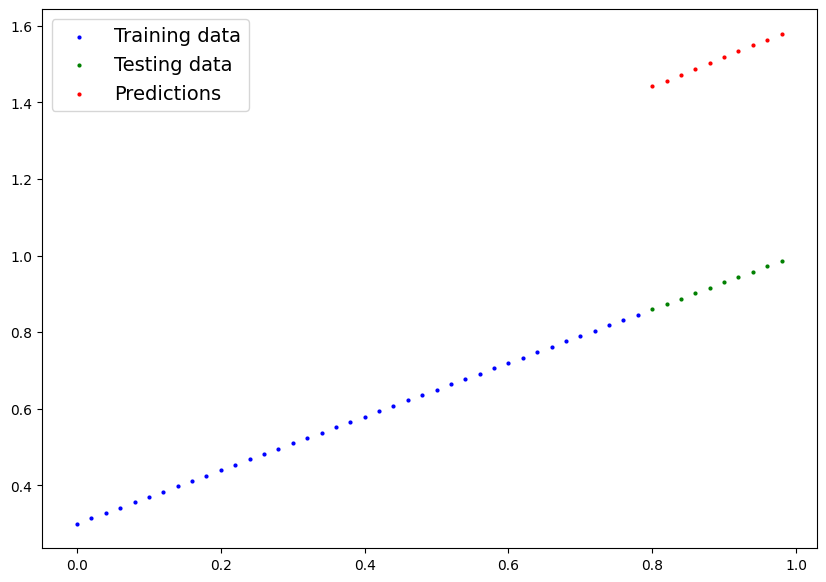

In [25]:
plot_predictions(predictions=y_preds)